## Import Neccessary Libreries

In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## importing dataset

In [2]:
airlines_data=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data" )

In [3]:
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


##   Data Understanding :

In [4]:
airlines_data.shape

(3999, 12)

In [5]:
airlines_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
airlines_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


##  Data Preprocessing:

In [8]:
airlines_data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [9]:
airlines_data_1=airlines_data.drop(labels=['ID#','Award?'],axis=1)

In [10]:
airlines_data_1.shape

(3999, 10)

In [11]:
airlines_data_1.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000


##  Standardization:

In [12]:
scaler = StandardScaler()

In [13]:
airlines_data_scaled= scaler.fit_transform(airlines_data_1)

In [14]:
airlines_data_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

##  1.K-Means clustering:

In [15]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(airlines_data_scaled)

KMeans(n_clusters=3, random_state=0)

In [16]:
kmeans.inertia_

27558.733200363567

### ###    The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

###      So we need to  find optimum number of  cluster:

###  CLUSTER VALIDATION TECHNIQUES:

###    1. Elbow Method
###    2. Silhouette score
###    3.Calinski harabasz score

## 1. Elbow Method:

In [17]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines_data_scaled)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[39990.000000000015,
 32088.279699590814,
 27558.73320036357,
 23807.81065883164,
 20348.785223089453,
 17724.87582897365,
 15871.129769316545,
 14359.144831709335,
 13228.03669375592,
 12145.559195424566,
 11470.93912592192,
 10917.58455577065,
 10567.671838004153,
 10074.620521141498,
 9695.915632477363,
 9271.236919091436,
 8888.898737069185,
 8637.812587028515,
 8316.978750749768,
 8072.522651728814]

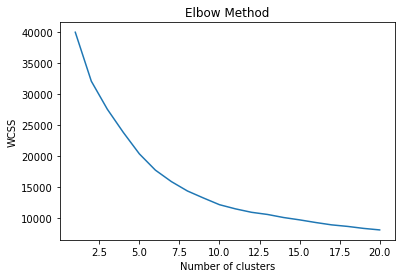

In [19]:
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Observation :

#### Elbow plot gives n_cluster =6

## 2.   Silhouette (clustering):

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [21]:
X=airlines_data_scaled

###  Setting the range

In [22]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12]

### Visualizing silhoutte score..for different cluster

For n_clusters = 2 The average silhouette_score is : 0.35826638416515033
For n_clusters = 3 The average silhouette_score is : 0.3301397716136463
For n_clusters = 4 The average silhouette_score is : 0.33239526755447385
For n_clusters = 5 The average silhouette_score is : 0.3478687759219968
For n_clusters = 6 The average silhouette_score is : 0.35986533423648287
For n_clusters = 7 The average silhouette_score is : 0.25909010850805575
For n_clusters = 8 The average silhouette_score is : 0.276029865696518
For n_clusters = 9 The average silhouette_score is : 0.2821118023175579
For n_clusters = 10 The average silhouette_score is : 0.27054825739338706
For n_clusters = 11 The average silhouette_score is : 0.2705279506778229
For n_clusters = 12 The average silhouette_score is : 0.27578627412130063


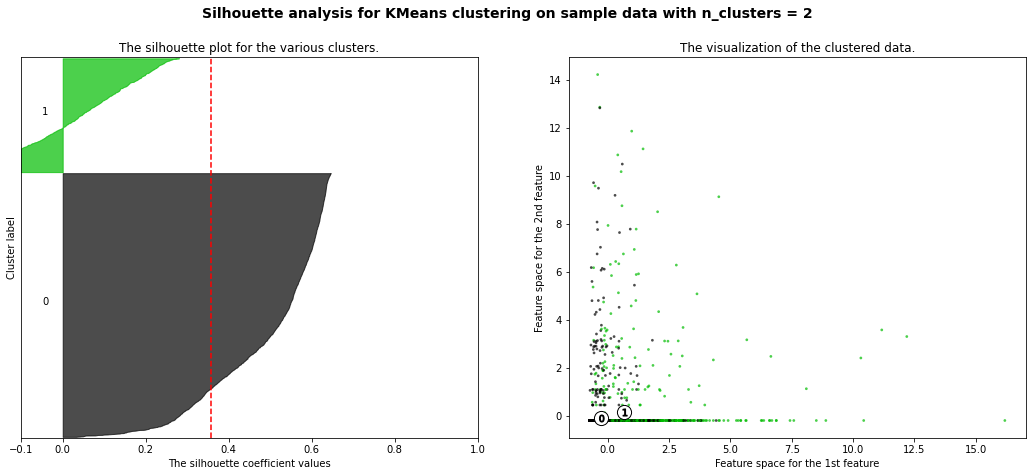

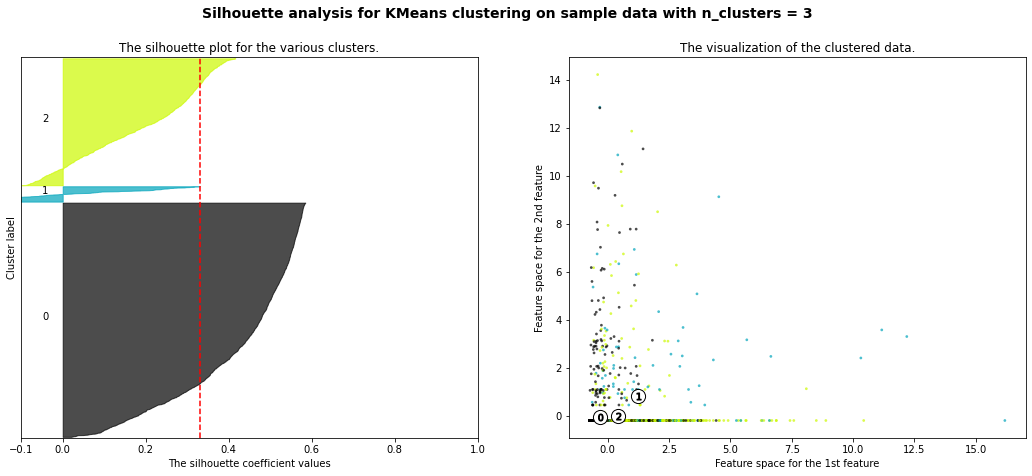

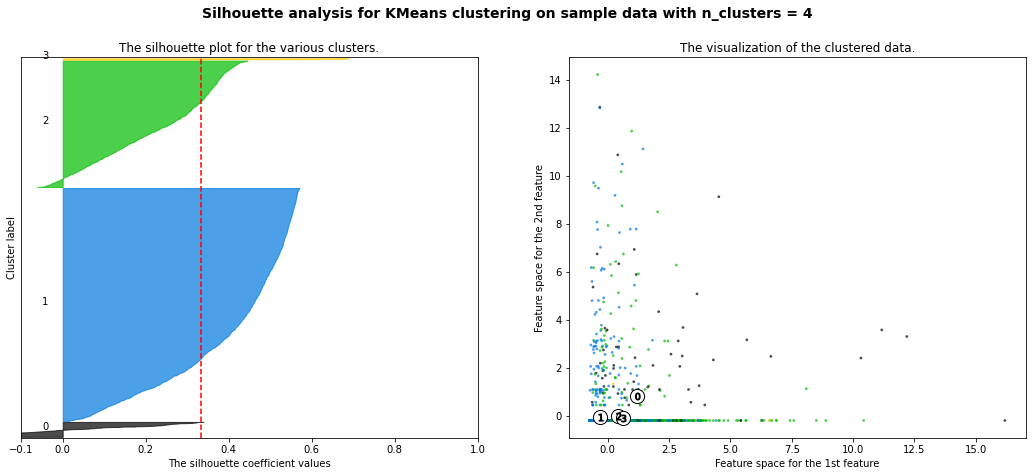

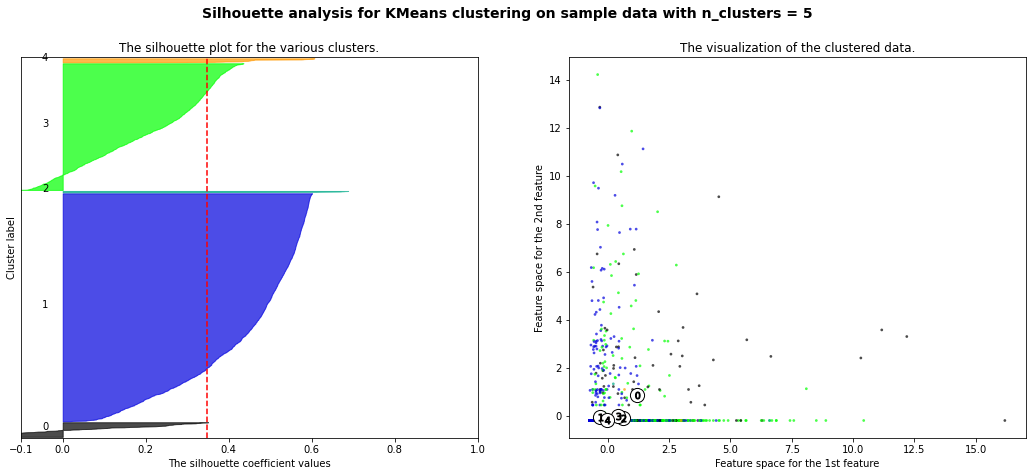

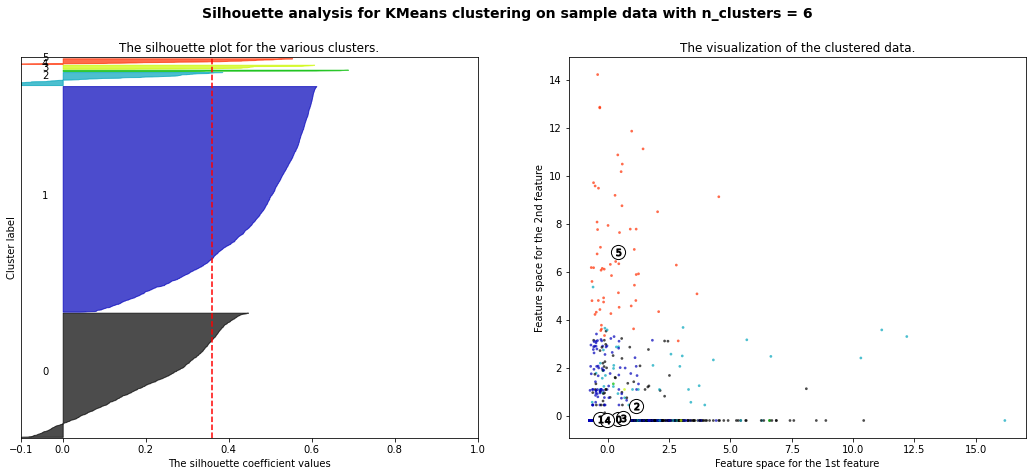

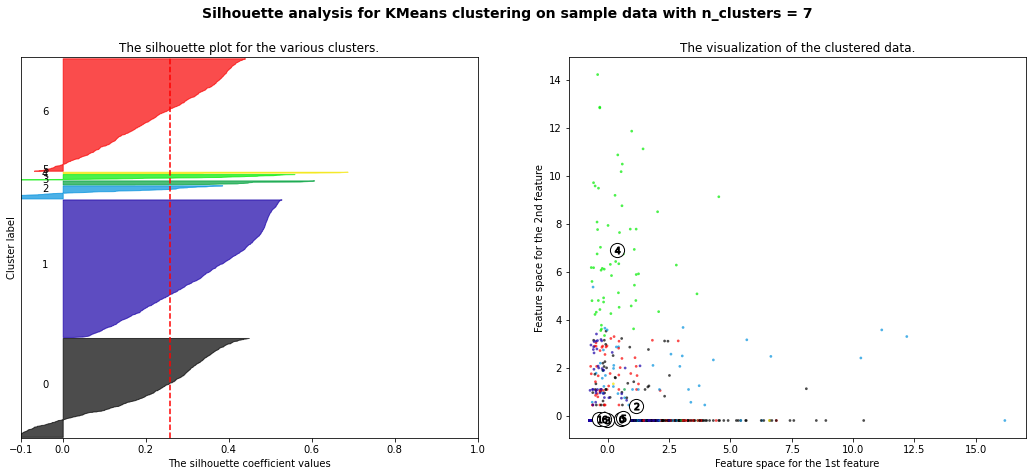

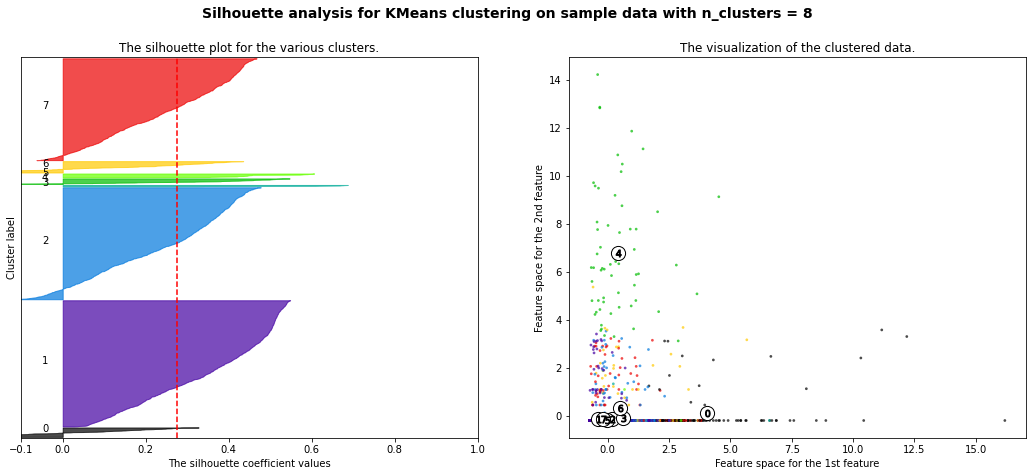

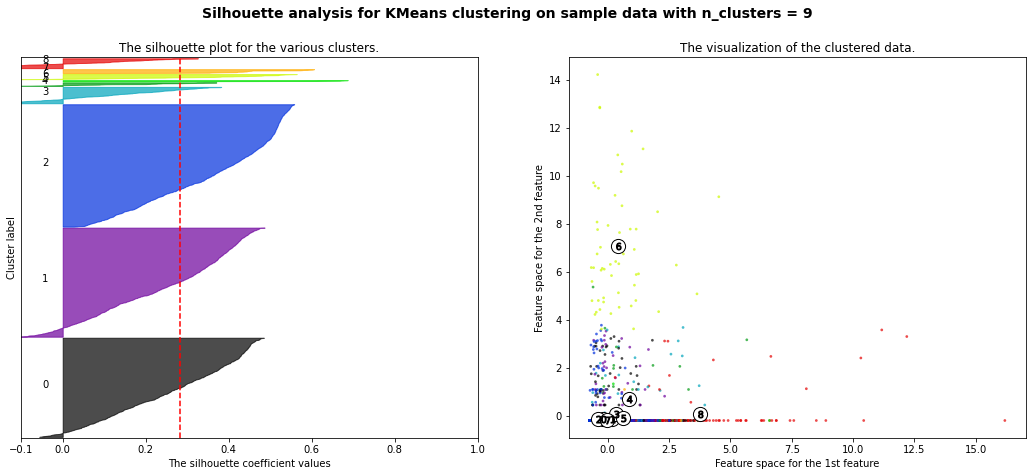

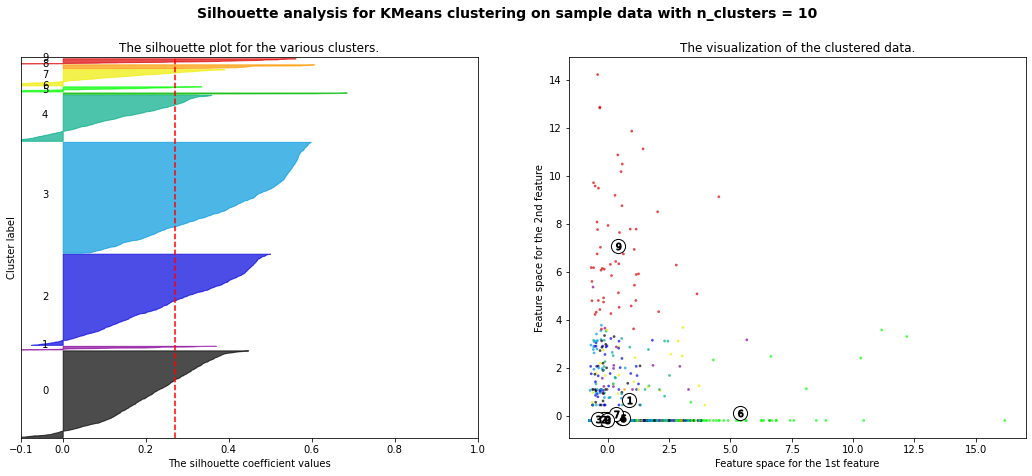

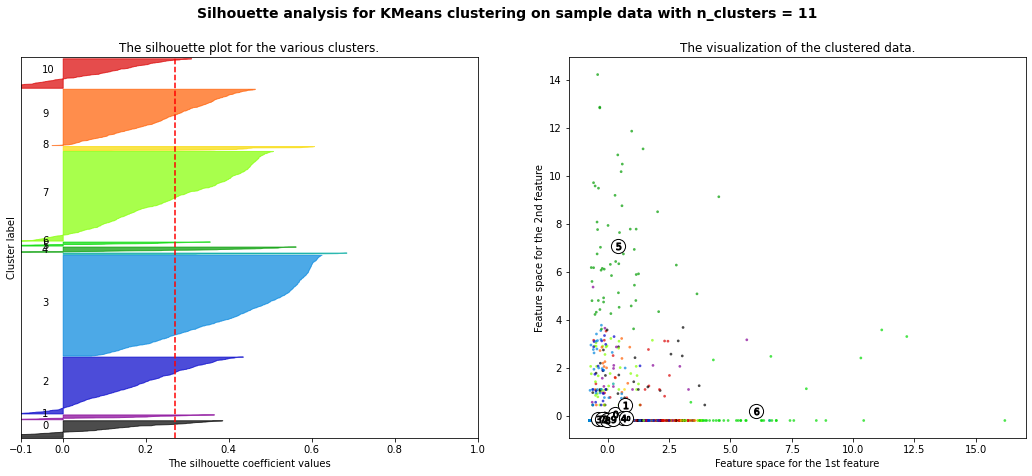

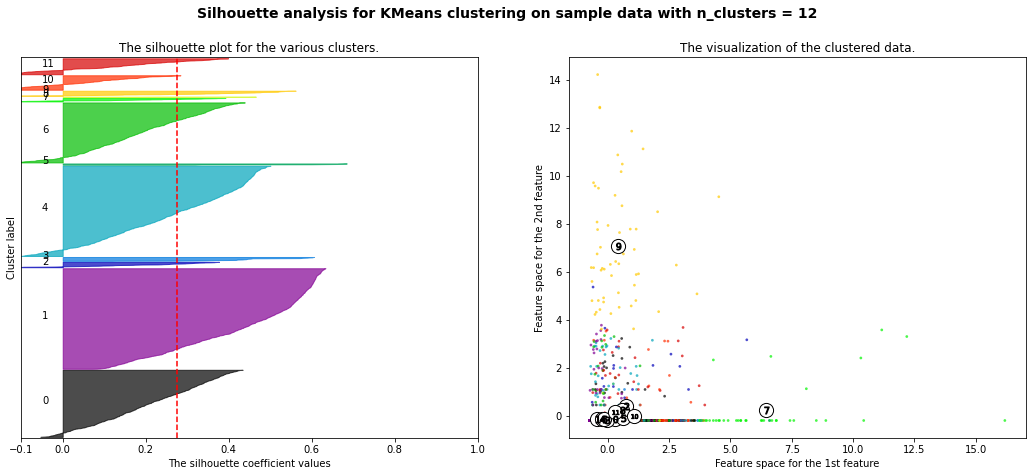

In [23]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Observation:

###  Silhouette score method gives  n_cluster ==  6

## 3.Calinski harabasz score:

In [24]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [25]:
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(X)
labels_1 = kmeans_model.labels_
metrics.calinski_harabasz_score(X, labels_1)

905.1327268553244

In [26]:
kmeans_model_1 = KMeans(n_clusters=5, random_state=1).fit(X)
labels_2 = kmeans_model_1.labels_
metrics.calinski_harabasz_score(X, labels_2)

886.6648783695442

In [27]:
val= []
for i in range(2, 11):
    kmeans_model_2 = KMeans(n_clusters=i, random_state=0).fit(X)
    labels_3 = kmeans_model_2.labels_
    score=metrics.calinski_harabasz_score(X,labels_3)
    val.append(score)

In [28]:
val

[984.2601362943731,
 901.2631634804673,
 905.1349764212182,
 963.7815483706723,
 1003.162354114567,
 1011.0867064951061,
 1017.6978305727746,
 1009.0332759123461,
 1016.1324260236212]

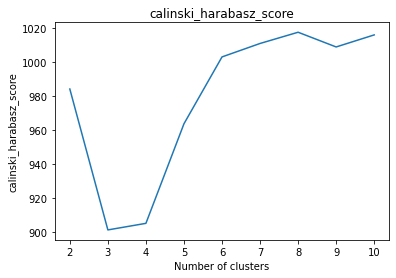

In [29]:
plt.plot(range(2, 11), val)
plt.title('calinski_harabasz_score')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

###  Observation:

####  higher the calinski _harabasz score the better model

####  it gives n_cluster==8

## from the above three cluster validation method :

###  So we try the model with n_cluster  ===6  

##  Model Building || Training

In [30]:
kmeans_1=KMeans(6, random_state=None)

In [31]:
kmeans_1.fit(airlines_data_scaled)

KMeans(n_clusters=6)

In [32]:
kmeans_1.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [33]:
kmeans_1.cluster_centers_

array([[-0.3748523 , -0.05122809, -0.5756842 , -0.09824189, -0.06276658,
        -0.50938985, -0.48564399, -0.19840242, -0.21647771, -0.94682374],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398],
       [ 0.47841591, -0.0224686 ,  1.29161744, -0.09824189, -0.05401761,
         1.00896983,  0.77754044, -0.08556904, -0.09557623,  0.33919441],
       [-0.16984416, -0.01783276, -0.58319197, -0.09824189, -0.05839955,
        -0.49832494, -0.43590997, -0.14715049, -0.15312437,  0.79266294],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261],
       [ 1.14873557,  0.85621849,  0.11551008, -0.09824189, -0.06276658,
         0.63765204,  1.66077444,  3.6783758 ,  3.93504028,  0.27572657]])

In [34]:
airlines_data_1_1=airlines_data_1.copy()

In [35]:
airlines_data_1_1['clusterid']=kmeans_1.labels_

In [36]:
airlines_data_1_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,3
1,19244,0,1,1,1,215,2,0,0,6968,3
2,41354,0,1,1,1,4123,4,0,0,7034,3
3,14776,0,1,1,1,500,1,0,0,6952,3
4,97752,0,4,1,1,43300,26,2077,4,6935,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


### Bar plot :

<Figure size 1152x720 with 0 Axes>

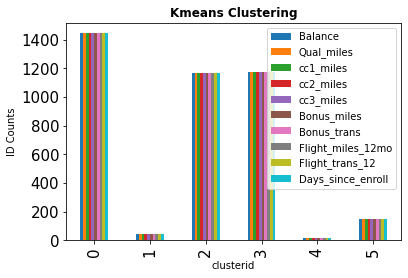

In [37]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
airlines_data_1_1.groupby(['clusterid']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Grouping with cluster number:

In [38]:
airlines_data_1_1.groupby(['clusterid']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clusterid,,,,,,,,,,
0,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446
1,43,43,43,43,43,43,43,43,43,43
2,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
3,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176
4,15,15,15,15,15,15,15,15,15,15
5,151,151,151,151,151,151,151,151,151,151


### Visualisation:

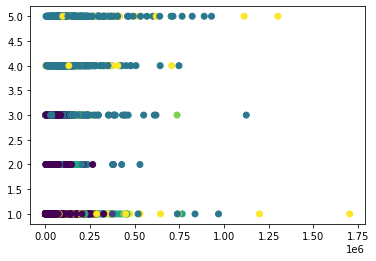

In [39]:
plt.scatter(airlines_data_1_1["Balance"], airlines_data_1_1["cc1_miles"], c=kmeans_1.labels_,cmap='viridis')

In [40]:
airlines_data_1_1[airlines_data_1_1['clusterid']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid
1129,1625,0,1,1,1,1375,4,0,0,1547,0
1424,22093,0,3,1,1,14857,11,200,1,2587,0
1431,44665,0,1,1,1,333,2,333,2,3601,0
1522,7291,0,1,1,1,0,0,0,0,4104,0
1549,65021,0,2,1,1,10369,12,0,0,3547,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [41]:
airlines_data_1_1[airlines_data_1_1['clusterid']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid
8,443003,0,3,2,1,1753,43,3850,12,6948,1
198,8669,0,1,3,1,11397,16,0,0,7486,1
226,117329,0,1,2,1,6448,11,0,0,7416,1
381,167670,0,1,3,1,15907,13,0,0,6994,1
392,11189,0,1,2,1,9044,20,0,0,8296,1
561,380930,0,2,2,1,22485,25,213,1,6539,1
794,55610,0,1,2,1,5095,13,0,0,6151,1
940,44824,0,1,3,1,21107,19,2000,4,5916,1
1149,84856,0,1,2,1,6894,13,0,0,5547,1
1270,16103,0,1,3,1,10819,13,0,0,5427,1


In [42]:
airlines_data_1_1[airlines_data_1_1['clusterid']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid
4,97752,0,4,1,1,43300,26,2077,4,6935,2
6,84914,0,3,1,1,27482,25,0,0,6994,2
9,104860,0,3,1,1,28426,28,1150,3,6931,2
11,96522,0,5,1,1,61105,19,0,0,6924,2
15,28495,0,4,1,1,49442,15,0,0,6912,2
...,...,...,...,...,...,...,...,...,...,...,...
3966,91605,0,4,1,1,37840,18,0,0,1444,2
3974,58387,0,3,1,1,14581,39,0,0,1435,2
3980,28867,0,3,1,1,19169,28,0,0,1425,2
3985,59017,0,4,1,1,34746,25,0,0,1418,2


In [43]:
airlines_data_1_1[airlines_data_1_1['clusterid']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,3
1,19244,0,1,1,1,215,2,0,0,6968,3
2,41354,0,1,1,1,4123,4,0,0,7034,3
3,14776,0,1,1,1,500,1,0,0,6952,3
5,16420,0,1,1,1,0,0,0,0,6942,3
...,...,...,...,...,...,...,...,...,...,...,...
2290,49874,0,1,1,1,7200,9,1700,4,3817,3
2293,56688,0,1,1,1,3550,10,1050,9,3812,3
2300,128620,0,2,1,1,7747,12,0,0,3789,3
3754,221543,0,1,1,1,10300,5,200,3,3554,3


In [44]:
airlines_data_1_1[airlines_data_1_1['clusterid']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid
106,96627,1182,1,1,3,49059,26,2300,9,6738,4
384,28193,0,5,1,4,103456,32,0,0,6980,4
850,25629,0,4,1,5,107308,36,600,2,5966,4
904,15835,0,2,1,5,112171,16,0,0,5825,4
1036,154664,0,4,1,3,73881,33,0,0,5769,4
1244,166465,0,4,1,4,98717,30,0,0,5531,4
1300,737514,0,3,1,4,43993,40,2150,7,5030,4
1878,128302,0,5,1,4,132263,32,400,2,4103,4
1917,82981,0,5,1,3,105325,44,1000,2,3964,4
1946,126873,0,4,1,5,95598,32,500,1,3880,4


In [45]:
airlines_data_1_1[airlines_data_1_1['clusterid']==5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid
42,60313,0,1,1,1,10000,26,3250,9,7829,5
50,108137,0,1,1,1,6368,5,6368,5,6844,5
65,53914,0,3,1,1,33767,45,5550,29,6826,5
94,185549,0,5,1,1,110859,39,2950,16,6778,5
112,124198,0,5,1,1,66330,23,4833,10,7710,5
...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,5
3911,55922,2273,1,1,1,8104,19,4104,16,1552,5
3917,130748,0,4,1,1,65510,37,6349,7,1545,5
3934,76595,0,1,1,1,10577,2,9577,1,1515,5


### Finding the mean values of various features:

In [46]:
airlines_data_1_1.groupby('clusterid').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid,,,,,,,,,,
0,35830.060858,104.486169,1.266943,1.000000,1.000000,4844.126556,6.938451,182.285615,0.552559,2163.485477
1,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233
2,121995.182363,127.059075,3.839897,1.000000,1.001712,41573.069349,19.081336,341.130137,1.013699,4817.522260
3,56468.015306,129.987245,1.261054,1.000000,1.000850,5140.934524,7.432823,253.392007,0.790816,5754.343537
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
5,189351.443709,806.456954,2.218543,1.000000,1.000000,32542.834437,27.549669,5609.907285,16.298013,4687.900662


###  Inferences:

#### we have 6 cluster 

#### among them several features have large avg values in different cluster , so we can say the  features values are distributed over the several clusters

##  2. Hierarchical Clustering:

In [47]:
airlines_data_1_2=airlines_data_1.copy()

###  Normalisation:

In [48]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [49]:
df_norm = norm_func(airlines_data_1_2)

## Dendrogram:

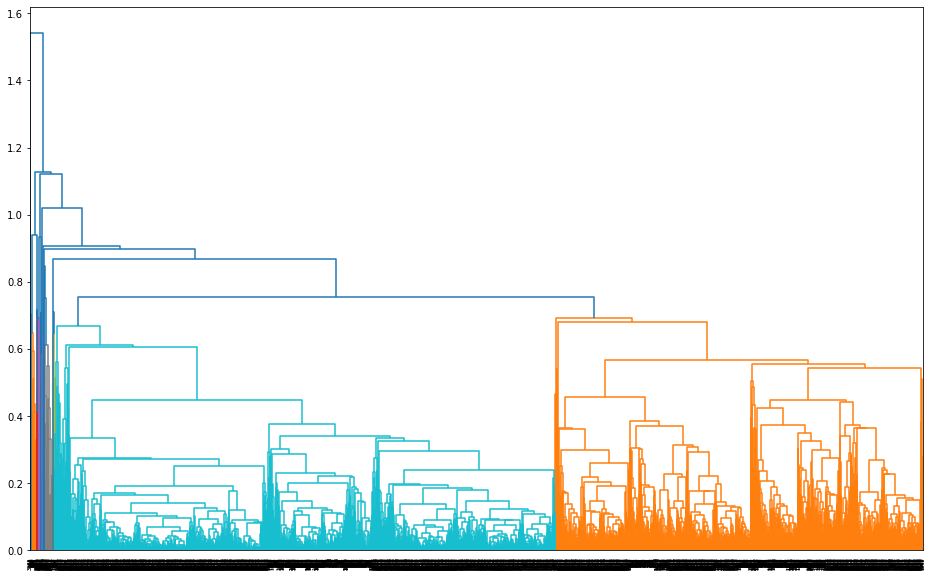

In [50]:
plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'),color_threshold=0.7)

### Model building:

In [51]:
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')

In [52]:
y_hc = hc.fit_predict(df_norm)

In [53]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [54]:
airlines_data_1_2['h_clusterid'] = Clusters

In [55]:
airlines_data_1_2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,2


###  Bar plot:

<Figure size 1152x720 with 0 Axes>

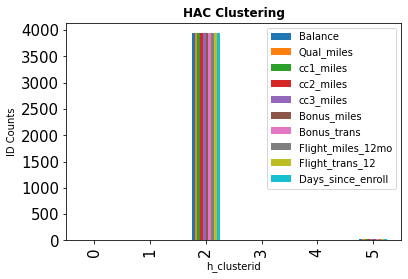

In [56]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
airlines_data_1_2.groupby(['h_clusterid']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('HAC Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Grouping by :

In [57]:
airlines_data_1_2.groupby(['h_clusterid']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
h_clusterid,,,,,,,,,,
0,15,15,15,15,15,15,15,15,15,15
1,8,8,8,8,8,8,8,8,8,8
2,3940,3940,3940,3940,3940,3940,3940,3940,3940,3940
3,2,2,2,2,2,2,2,2,2,2
4,7,7,7,7,7,7,7,7,7,7
5,27,27,27,27,27,27,27,27,27,27


###  Visualisation:

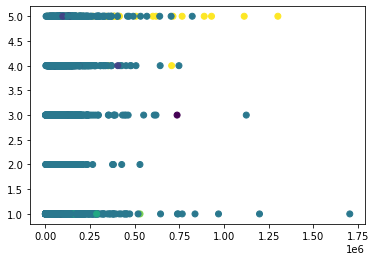

In [58]:
plt.scatter(airlines_data_1_2["Balance"], airlines_data_1_2["cc1_miles"], c=hc.labels_,cmap='viridis')

###  Finding the mean values of various features:

In [59]:
airlines_data_1_2.groupby('h_clusterid').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,
0,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
1,121283.125000,983.375000,4.250000,1.000000,1.000000,64456.375000,53.750000,9670.875000,28.500000,2611.375000
2,70554.741878,125.024873,2.031980,1.014721,1.000761,16041.882741,11.265736,405.865228,1.213706,4096.237310
3,223573.500000,250.000000,1.000000,1.000000,1.000000,49057.500000,72.000000,21845.000000,53.000000,1822.500000
4,158765.285714,9158.000000,1.285714,1.000000,1.000000,9694.000000,14.000000,1770.142857,5.142857,5789.857143
5,435049.481481,372.629630,4.925926,1.000000,1.000000,120988.148148,33.925926,3689.111111,11.740741,7284.111111


###  Inferences:

####   Hierarchical Clustering: We have 6 cluster

#### Among them -->  cluster 5 have high average values for the   most of the features 

####  among them several features have large avg values in different cluster , so we can say the  features values are distributed over the several clusters

###  most of the data concentrated around cluster 2

## 3.DBSCAN Clustering:

In [60]:
airlines_data_1_4=airlines_data_1.copy()

In [61]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [62]:
normal_data=norm_func(airlines_data_1_4)

In [63]:
normal_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


###  Model Building|| Training:

###  #### eps=0.3,min_samples=20,metric='euclidean'

In [64]:
dbscan=DBSCAN(eps=0.3,min_samples=20,metric='euclidean')

In [65]:
dbscan.fit_predict(normal_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [68]:
airlines_data_1_4["cluster"]=c1

<Figure size 1152x720 with 0 Axes>

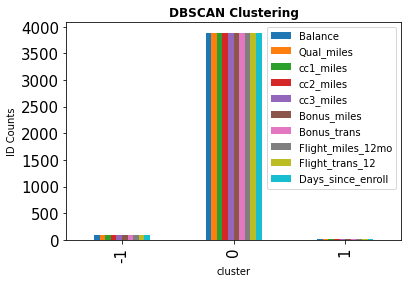

In [69]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
airlines_data_1_4.groupby(['cluster']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [70]:
airlines_data_1_4.groupby(['cluster']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
cluster,,,,,,,,,,
-1,91,91,91,91,91,91,91,91,91,91
0,3888,3888,3888,3888,3888,3888,3888,3888,3888,3888
1,20,20,20,20,20,20,20,20,20,20


###   Finding the mean values of various features:

In [71]:
airlines_data_1_4.groupby('cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,
-1,242187.681319,1752.351648,2.692308,1.417582,1.505495,59525.395604,27.978022,3386.956044,10.076923,5047.846154
0,69842.494342,107.214506,2.050154,1.000000,1.000772,16195.285751,11.208333,392.669753,1.172840,4099.419496
1,37250.600000,0.000000,1.000000,2.000000,1.000000,8907.900000,13.600000,242.500000,0.800000,3611.100000


### Visualisation:

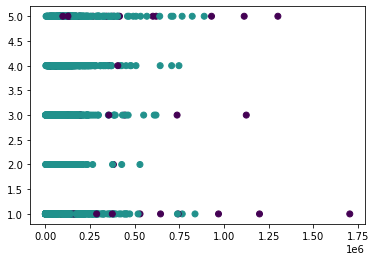

In [72]:
plt.scatter(airlines_data_1_4["Balance"], airlines_data_1_4["cc1_miles"], c=dbscan.labels_,cmap='viridis')

###  eps=0.5,min_samples=20,metric='euclidean'

In [73]:
dbscan_1=DBSCAN(eps=0.5,min_samples=20,metric='euclidean')

In [74]:
dbscan_1.fit_predict(normal_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
c2=pd.DataFrame(dbscan_1.labels_,columns=['cluster'])

In [76]:
airlines_data_1_5=airlines_data_1.copy()

In [77]:
airlines_data_1_5["cluster"]=c2

###  Bar plot

<Figure size 1152x720 with 0 Axes>

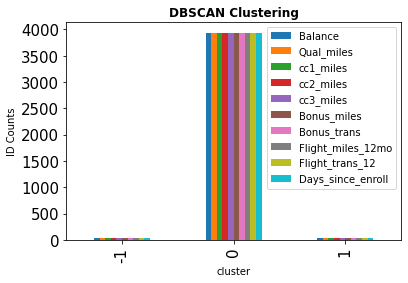

In [78]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
airlines_data_1_5.groupby(['cluster']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [79]:
airlines_data_1_5.groupby(['cluster']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
cluster,,,,,,,,,,
-1,36,36,36,36,36,36,36,36,36,36
0,3937,3937,3937,3937,3937,3937,3937,3937,3937,3937
1,26,26,26,26,26,26,26,26,26,26


In [80]:
airlines_data_1_5.groupby('cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,
-1,149261.361111,66.333333,2.222222,1.888889,2.166667,59314.305556,28.388889,2911.805556,8.277778,4090.722222
0,72969.973330,145.777496,2.064770,1.000000,1.001778,16804.819914,11.420117,437.928626,1.310643,4120.576581
1,64442.884615,0.000000,1.038462,2.000000,1.000000,10244.192308,15.884615,415.884615,1.346154,3851.653846


### Visualisation:

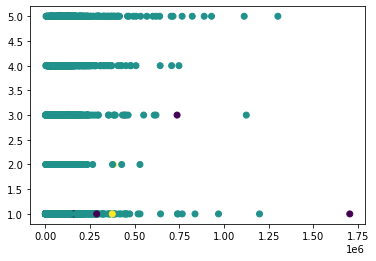

In [81]:
plt.scatter(airlines_data_1_5["Balance"], airlines_data_1_5["cc1_miles"], c=dbscan_1.labels_,cmap='viridis')

###  ###  eps=1.5,min_samples=20,metric='euclidean'

In [82]:
dbscan_2=DBSCAN(eps=1.5,min_samples=20,metric='euclidean')

In [83]:
dbscan_1.fit_predict(normal_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
c3=pd.DataFrame(dbscan_1.labels_,columns=['cluster'])

In [85]:
airlines_data_1_6=airlines_data_1.copy()


In [86]:
airlines_data_1_6["cluster"]=c2

In [87]:
airlines_data_1_6.groupby('cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,
-1,149261.361111,66.333333,2.222222,1.888889,2.166667,59314.305556,28.388889,2911.805556,8.277778,4090.722222
0,72969.973330,145.777496,2.064770,1.000000,1.001778,16804.819914,11.420117,437.928626,1.310643,4120.576581
1,64442.884615,0.000000,1.038462,2.000000,1.000000,10244.192308,15.884615,415.884615,1.346154,3851.653846


###  Bar plot

<Figure size 1152x720 with 0 Axes>

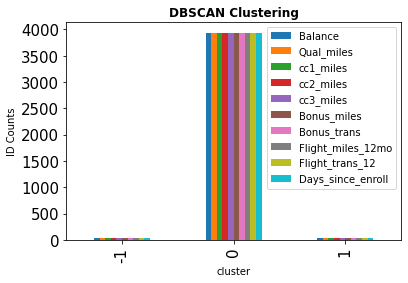

In [88]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
airlines_data_1_6.groupby(['cluster']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

###  Grouping by cluster number:

In [89]:
airlines_data_1_6.groupby(['cluster']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
cluster,,,,,,,,,,
-1,36,36,36,36,36,36,36,36,36,36
0,3937,3937,3937,3937,3937,3937,3937,3937,3937,3937
1,26,26,26,26,26,26,26,26,26,26


### Visualisation:

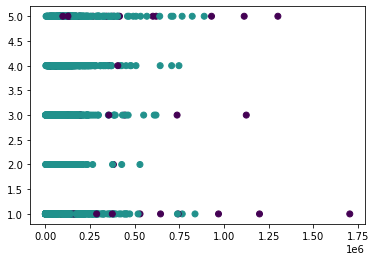

In [93]:
plt.scatter(airlines_data_1_4["Balance"], airlines_data_1_4["cc1_miles"], c=dbscan.labels_,cmap='viridis')

###  Inferences :

####   cluster -1 corrosponds to outliers   

#### above scatter plot shows  almost all datapoints clustered around cluster 0 

####   Now among the two cluster(cluster(0) and cluster(1)) --> cluster 0 have high  average  values for features related to airlines transaction


#### most of the datapoints concentrated around cluster 0  and cluster 1 have very few datapoints